In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap


In [ ]:
# Load the dataset
df = pd.read_csv("/content/StressLevelDataset.csv")

print(df.head())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [ ]:
# Check for missing values
print(df.isnull().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [ ]:
# Normalize numerical columns for scaling between 0 and 1
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


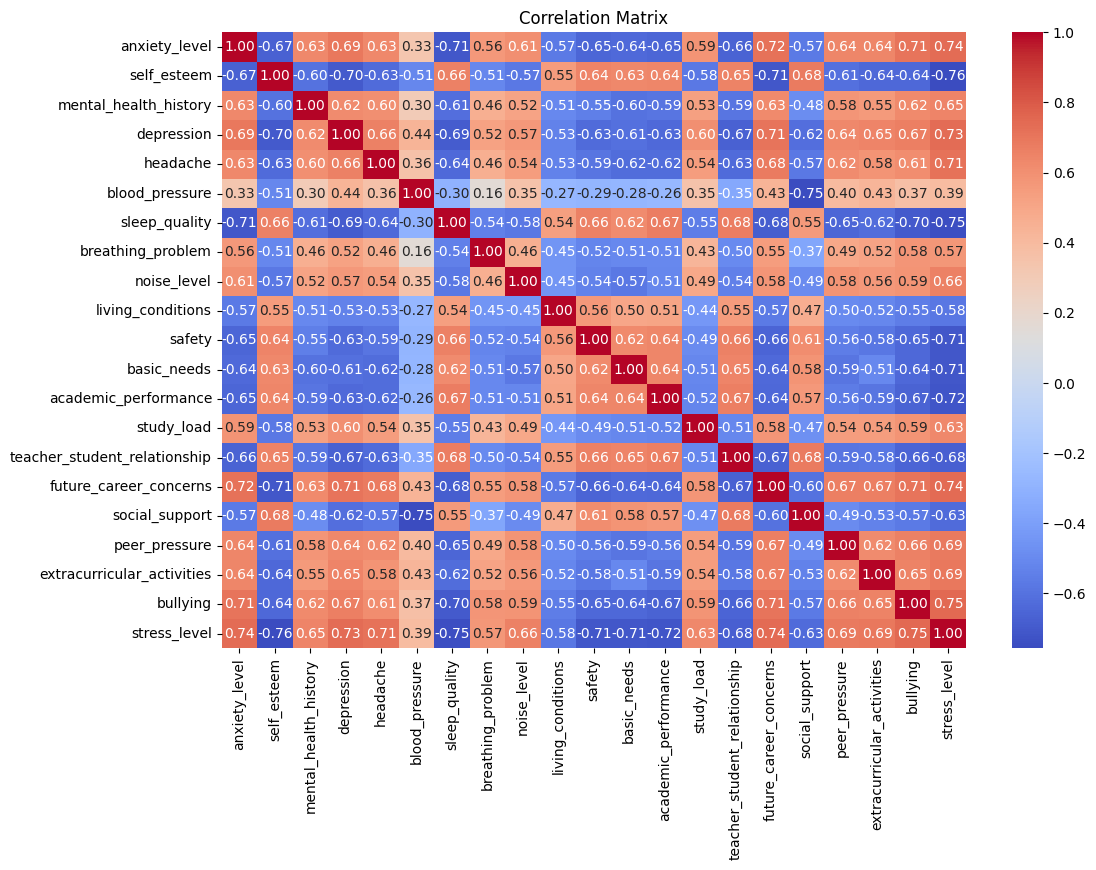

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

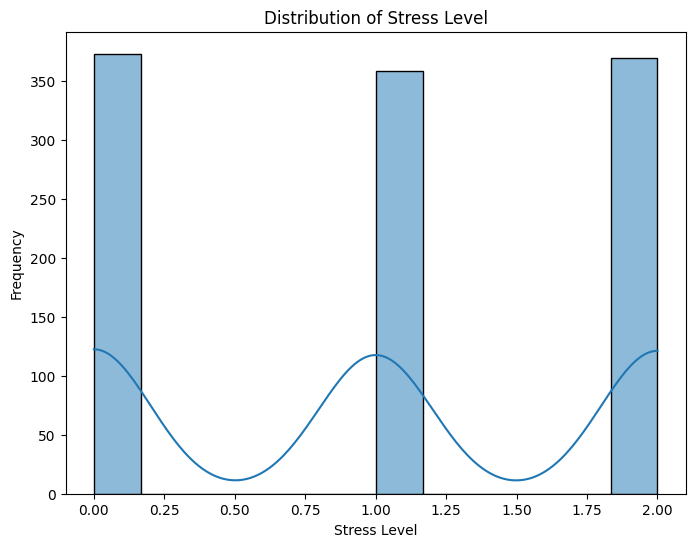

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['stress_level'], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


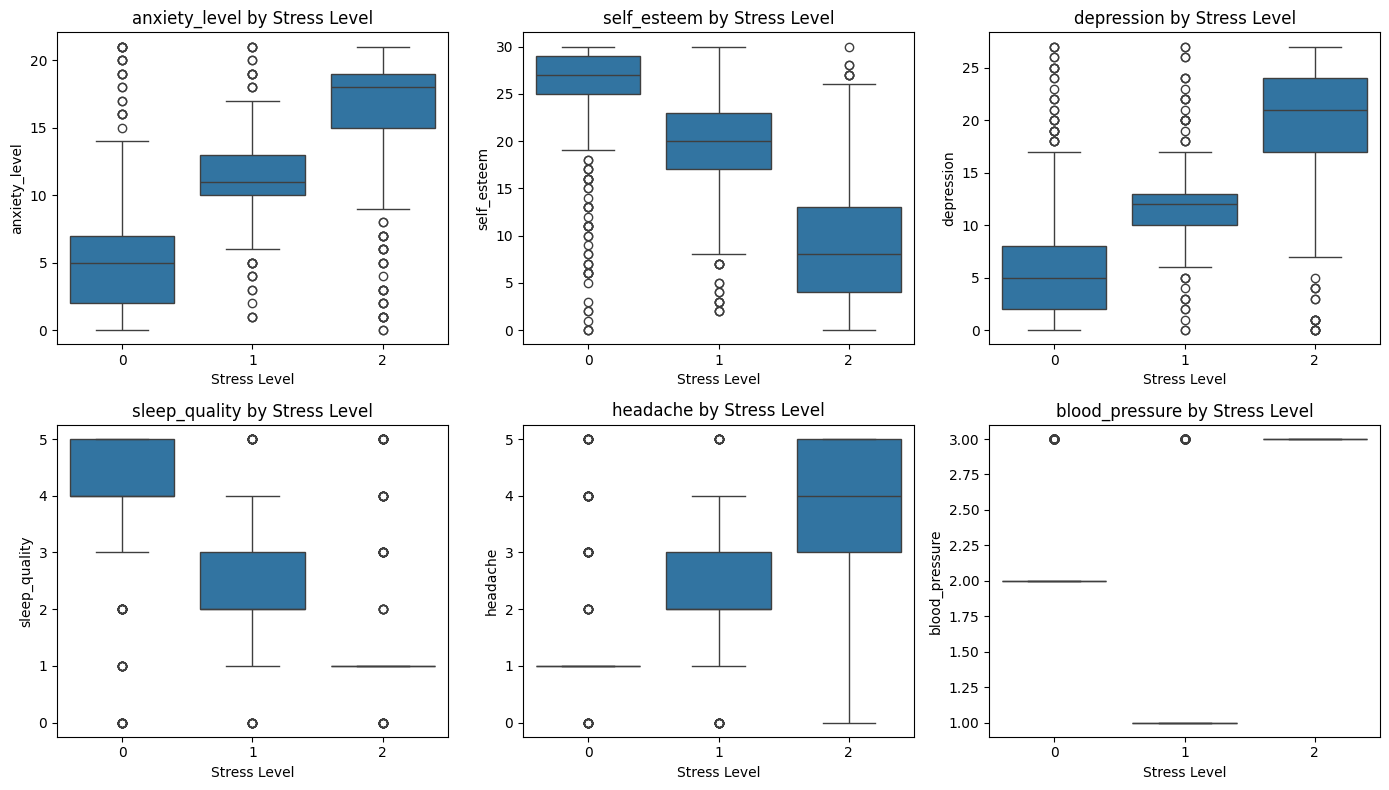

In [ ]:
# Define the features you want to plot against 'stress_level'
features = ['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'headache', 'blood_pressure']

# Set up the plotting area
plt.figure(figsize=(14, 8))

# Create individual box plots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Adjust the layout if needed (e.g., 2 rows, 3 columns)
    sns.boxplot(x='stress_level', y=feature, data=df)
    plt.title(f'{feature} by Stress Level')
    plt.xlabel('Stress Level')
    plt.ylabel(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

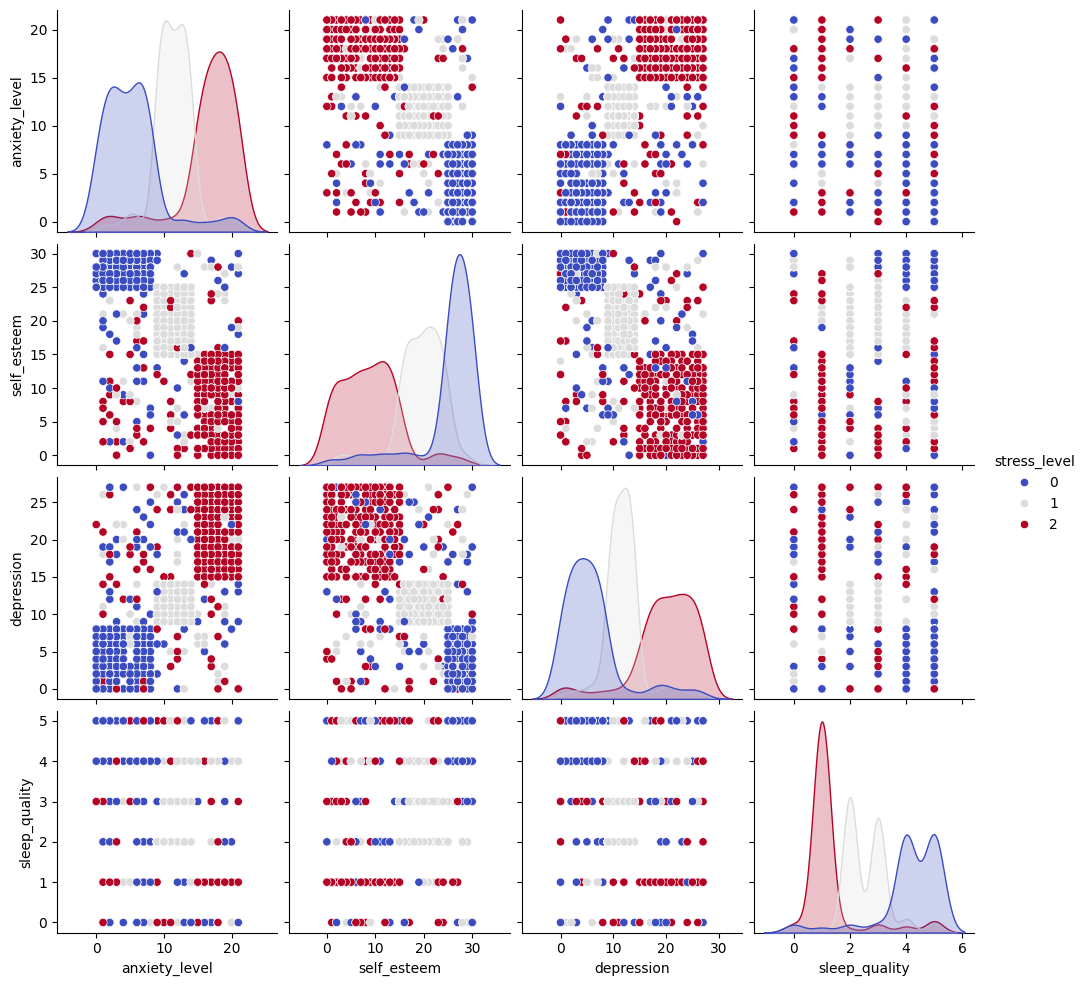

In [ ]:
selected_columns = ['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'stress_level']
sns.pairplot(df[selected_columns], hue='stress_level', palette='coolwarm')
plt.show()


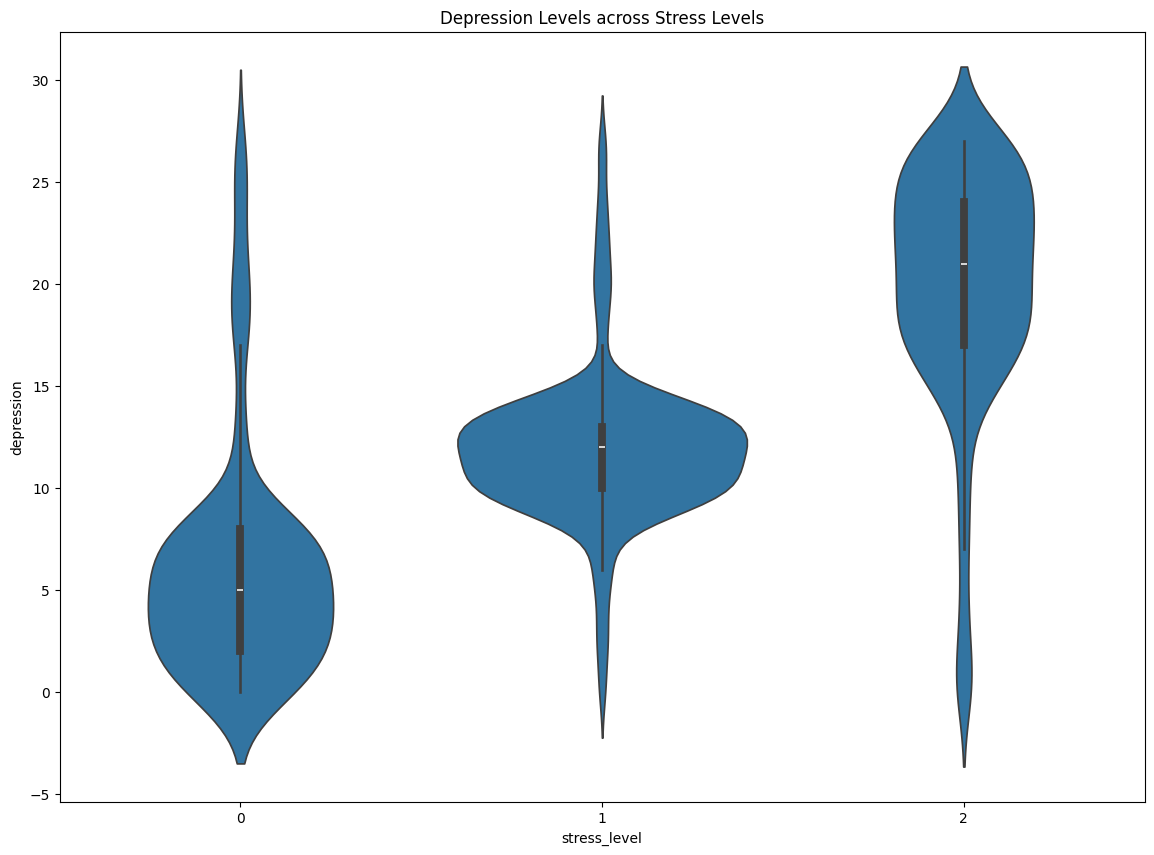

In [ ]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='stress_level', y='depression', data=df)
plt.title('Depression Levels across Stress Levels')
plt.show()


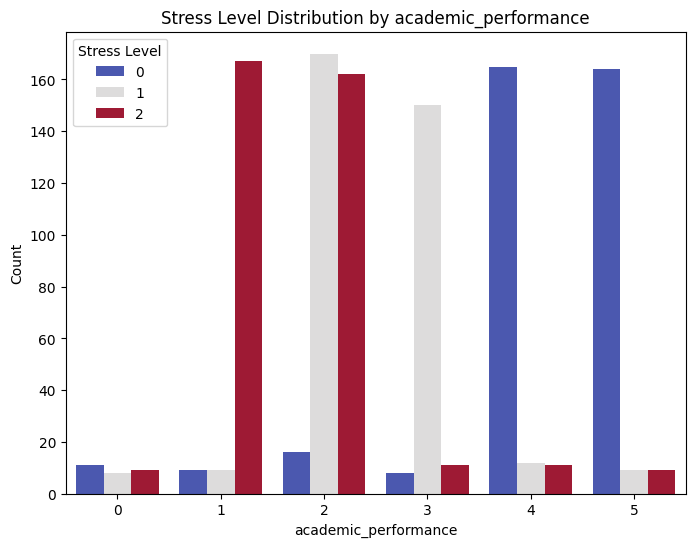

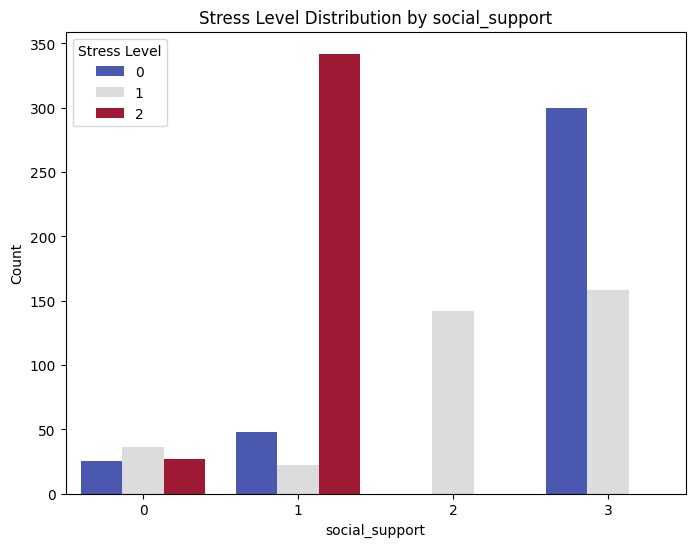

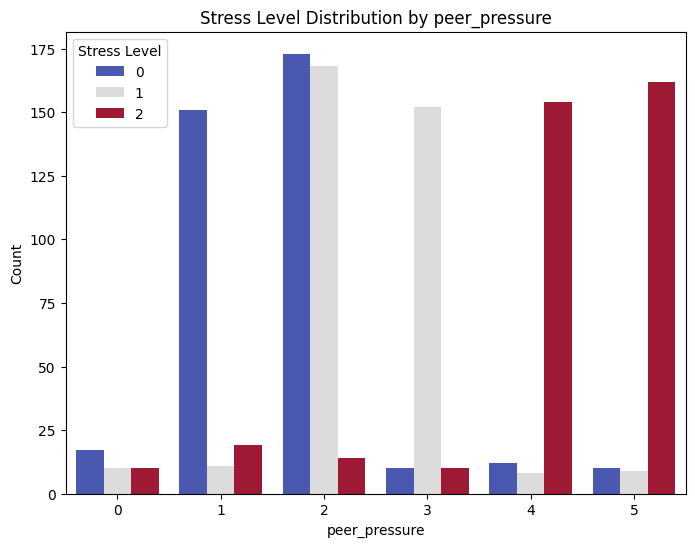

In [ ]:
categorical_features = ['academic_performance', 'social_support', 'peer_pressure']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='stress_level', data=df, palette='coolwarm')
    plt.title(f'Stress Level Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Stress Level')
    plt.show()


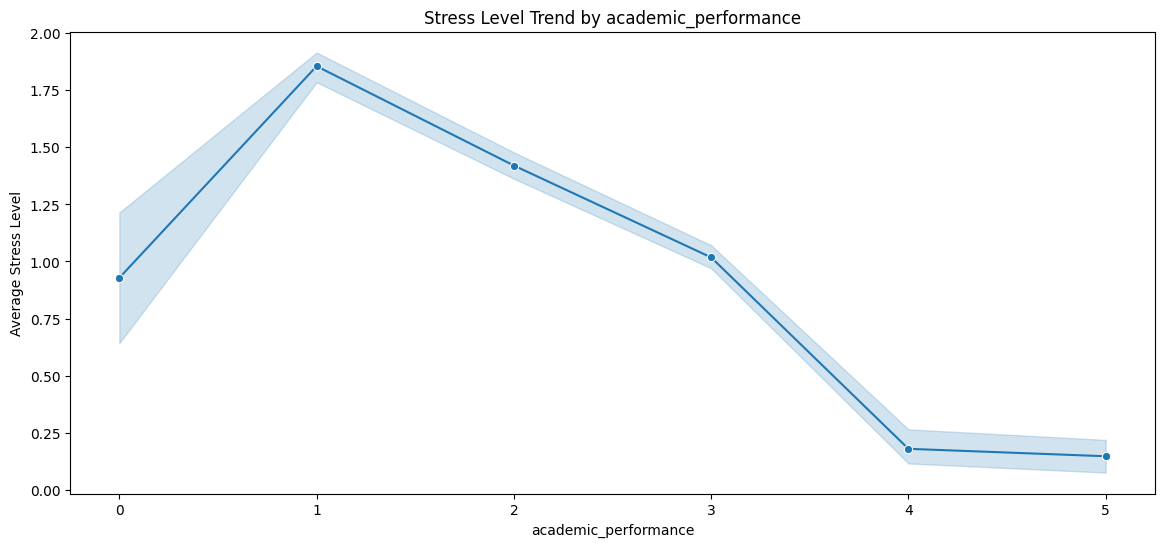

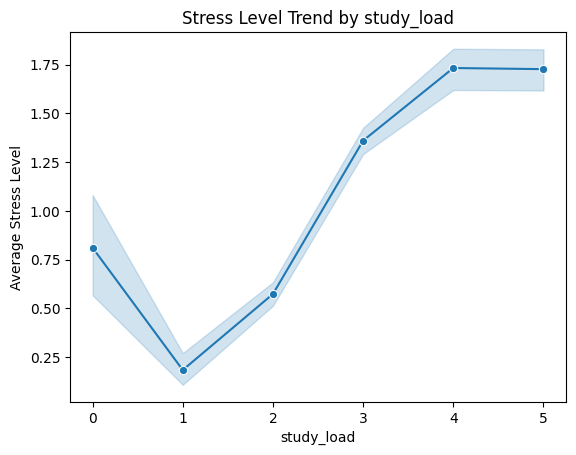

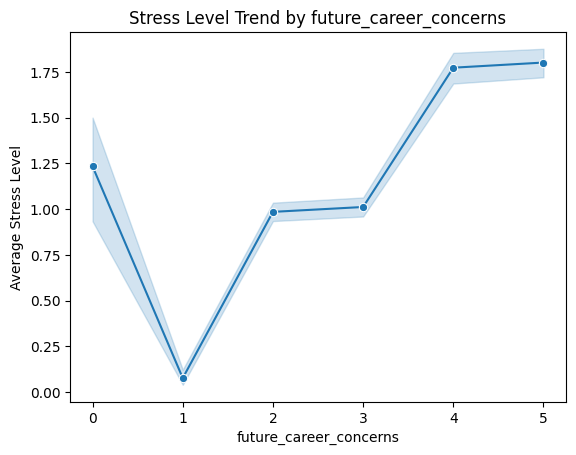

In [ ]:
ordinal_features = ['academic_performance', 'study_load', 'future_career_concerns']

plt.figure(figsize=(14, 6))
for feature in ordinal_features:
    sns.lineplot(x=feature, y='stress_level', data=df, marker='o')
    plt.title(f'Stress Level Trend by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Stress Level')
    plt.show()


In [ ]:
# Separate features and target
X = df.drop(columns=['stress_level'])
y = df['stress_level']

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer (3 possible stress levels: 0, 1, 2)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4081 - loss: 1.0869 - val_accuracy: 0.6227 - val_loss: 0.9778
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6143 - loss: 0.8979 - val_accuracy: 0.6091 - val_loss: 0.6305
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6034 - loss: 0.6931 - val_accuracy: 0.6545 - val_loss: 0.5093
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7498 - loss: 0.5755 - val_accuracy: 0.8864 - val_loss: 0.4480
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.5268 - val_accuracy: 0.8727 - val_loss: 0.3849
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8546 - loss: 0.4538 - val_accuracy: 0.8727 - val_loss: 0.2955
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8534 - loss: 0.3662 - val_accuracy: 0.8727 - val_loss: 0.2497
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8843 - loss: 0.2773 - val_accuracy: 0.8818 - 

In [ ]:
# Predicting on test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model Accuracy: 89.09%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        76
           1       0.92      0.89      0.90        73
           2       0.90      0.86      0.88        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



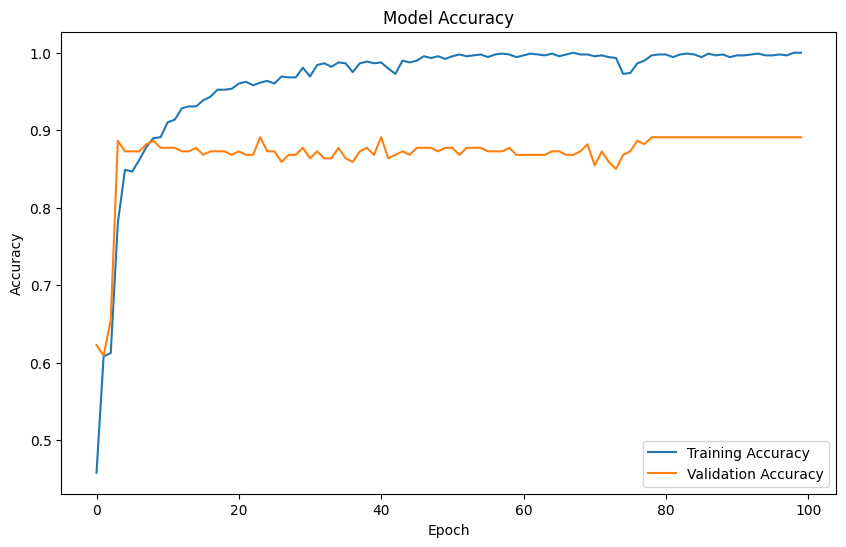

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

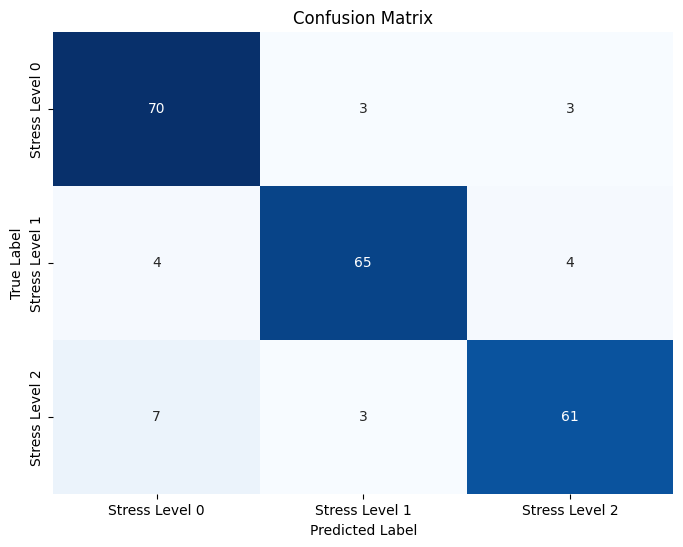

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stress Level 0', 'Stress Level 1', 'Stress Level 2'],
            yticklabels=['Stress Level 0', 'Stress Level 1', 'Stress Level 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

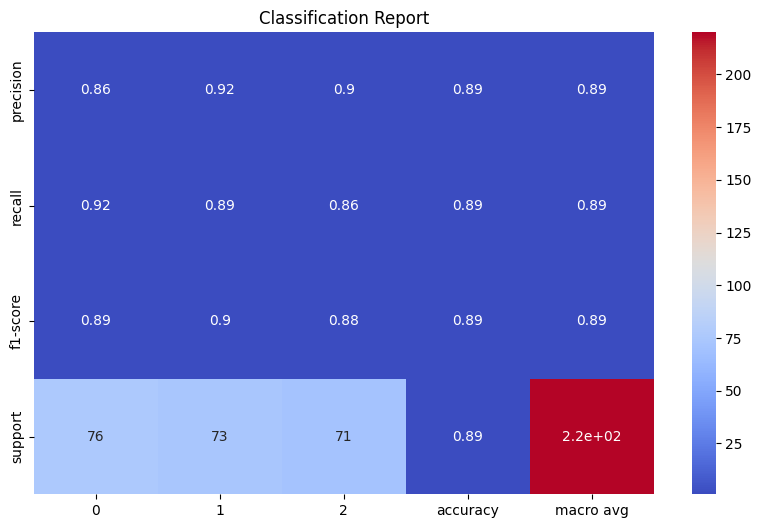

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report and convert it to a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()


In [ ]:
import numpy as np
import shap

# Assuming 'model' is already a trained model and 'X_train' is your training dataset with features used for training
explainer = shap.Explainer(model, X_train)  # Initialize the SHAP explainer

def get_user_input():
    """Collect user input for each feature in X."""
    feature_names = X.columns
    user_input = []
    print("Please enter the following values:")
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

def predict_stress_level(input_data):
    """Predict stress level using the trained model."""
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

def get_health_website_links(factor):
    # Provide relevant health websites based on the influential factor
    suggestions = {
        'anxiety_level': [
            "Anxiety and Depression Association of America: https://adaa.org/",
            "Mayo Clinic (Anxiety): https://www.mayoclinic.org/diseases-conditions/anxiety/symptoms-causes/syc-20350961"
        ],
        'self_esteem': [
            "Verywell Mind (Self-Esteem): https://www.verywellmind.com/what-is-self-esteem-2795868",
            "American Psychological Association (APA) - Self Esteem: https://www.apa.org/topics/self-esteem"
        ],
        'mental_health_history': [
            "Mental Health America: https://www.mhanational.org/",
            "National Alliance on Mental Illness (NAMI): https://www.nami.org/"
        ],
        'depression': [
            "National Institute of Mental Health (NIMH): https://www.nimh.nih.gov/health/topics/depression",
            "Mental Health America: https://www.mhanational.org/"
        ],
        'headache': [
            "American Migraine Foundation: https://americanmigrainefoundation.org/",
            "Mayo Clinic (Headaches): https://www.mayoclinic.org/diseases-conditions/headache/symptoms-causes/syc-20361701"
        ],
        'blood_pressure': [
            "American Heart Association: https://www.heart.org/en/health-topics/high-blood-pressure",
            "Mayo Clinic (Blood Pressure): https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20363148"
        ],
        'sleep_quality': [
            "Sleep Foundation: https://www.sleepfoundation.org/",
            "National Institutes of Health (NIH) - Sleep: https://www.nhlbi.nih.gov/health-topics/sleep-deprivation-and-deficiency"
        ],
        'breathing_problem': [
            "American Lung Association: https://www.lung.org/",
            "Mayo Clinic (Shortness of Breath): https://www.mayoclinic.org/symptoms/shortness-of-breath/basics/definition/sym-20050890"
        ],
        'noise_level': [
            "CDC - Environmental Noise: https://www.cdc.gov/nceh/hearing_loss/what_noises_cause_hearing_loss.html",
            "World Health Organization (WHO) - Noise: https://www.who.int/health-topics/environmental-noise"
        ],
        'living_conditions': [
            "CDC - Healthy Homes: https://www.cdc.gov/nceh/lead/tools/healthy_homes.htm",
            "HUD - Healthy Homes: https://www.hud.gov/program_offices/healthy_homes"
        ],
        'safety': [
            "CDC - Safety and Health: https://www.cdc.gov/niosh/topics/safety.html",
            "OSHA (Occupational Safety and Health Administration): https://www.osha.gov/"
        ],
        'basic_needs': [
            "UNICEF - Basic Needs: https://www.unicef.org/",
            "United Nations - Sustainable Development Goals: https://sdgs.un.org/goals"
        ],
        'academics_performance': [
            "American Psychological Association - Academic Performance: https://www.apa.org/topics/academics",
            "Education.com - Student Achievement: https://www.education.com/"
        ],
        'study_load': [
            "Mayo Clinic - Student Stress: https://www.mayoclinic.org/healthy-lifestyle/tween-and-teen-health/in-depth/teen-stress/art-20368720",
            "American Psychological Association - Student Workload: https://www.apa.org/topics/education/stress"
        ],
        'teacher_student_relationship': [
            "Edutopia - Teacher-Student Relationships: https://www.edutopia.org/",
            "American Psychological Association - Teacher Resources: https://www.apa.org/pi/families/resources/education"
        ],
        'future_career_concerns': [
            "CareerOneStop - Career Exploration: https://www.careeronestop.org/",
            "National Career Development Association: https://www.ncda.org/"
        ],
        'social_support': [
            "Mental Health Foundation - Social Support: https://www.mentalhealth.org.uk/",
            "HelpGuide - Building Social Support: https://www.helpguide.org/articles/mental-health/building-social-support.htm"
        ],
        'peer_pressure': [
            "Mayo Clinic - Teen Health: https://www.mayoclinic.org/healthy-lifestyle/tween-and-teen-health/in-depth/teen-health/art-20044664",
            "American Psychological Association - Peer Influence: https://www.apa.org/news/press/releases/stress/2020/teen-stress"
        ],
        'extracurricular_activities': [
            "Youth.gov - Extracurricular Activities: https://youth.gov/",
            "Edutopia - Benefits of Extracurriculars: https://www.edutopia.org/"
        ],
        'bullying': [
            "StopBullying.gov: https://www.stopbullying.gov/",
            "CDC - Bullying Prevention: https://www.cdc.gov/violenceprevention/youthviolence/bullyingresearch/index.html"
        ]
    }
    return suggestions.get(factor, [])

def provide_suggestions(stress_level, influential_feature=None):
    """Provide health resources based on the predicted stress level and influential factor."""
    print(f"Predicted Stress Level: {stress_level}")

    if influential_feature:
        print(f"Most Influential Factor: {influential_feature}")

        # Get health links related to the influential factor
        health_links = get_health_website_links(influential_feature)
        print("Suggested Health Resources:")
        for link in health_links:
            print(link)
    else:
        print("No specific influential factors were identified.")

# Get input from the user and predict the stress level
user_data = get_user_input()
predicted_stress_level = predict_stress_level(user_data)

# Determine the most influential feature if the stress level is not zero
influential_feature_name = None
if predicted_stress_level != 0:
    shap_values = explainer(user_data)
    mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)  # Calculate mean absolute SHAP values
    influential_feature_index = np.argmax(mean_shap_values)
    influential_feature_name = X.columns[influential_feature_index]

# Provide suggestions based on the predicted stress level and influential feature
provide_suggestions(predicted_stress_level, influential_feature_name)


Please enter the following values:
